In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  


%matplotlib inline

In [2]:
df1 = pd.read_csv('Laptop_price1.csv', encoding='latin1')
df2 = pd.read_csv('Laptop-price2.csv', encoding='latin1')
df3 = pd.read_csv('Laptop-price3.csv', encoding='latin1')

In [ ]:
In today’s digital age, laptops are essential tools for education, work, gaming, and creative pursuits. However, the laptop 
market is vast and complex, with prices varying widely based on technical specifications and brand. For consumers, understanding
what factors drive laptop prices is crucial for making informed purchasing decisions.

This project aims to analyze the relationship between laptop features and their prices using data-driven methods. By applying 
techniques such as regression, classification, clustering, and visualization, we seek to answer the core questions:

What features most significantly influence the price of a laptop, and how can we model or group laptops based on these 
characteristics?
-
How do hardware specifications (e.g., RAM, storage type, screen resolution) correlate with laptop price?
→ This helps determine which numeric features have the strongest impact on cost.

Do certain brands (e.g., Apple, Dell, HP) have significantly higher or lower prices for similar specs?
→ This explores brand influence and market positioning.

What role does the processor and GPU brand play in determining the price of a laptop?
→ This breaks down the impact of high-performance components.

Can we cluster laptops into groups based on their specifications and identify price tiers?
→ This uses clustering to segment the market and detect value groups.
 
The analysis leverages multiple datasets with detailed specifications, including CPU and GPU brands, RAM size, storage type,
screen resolution, and more. Through this exploration, we hope to uncover pricing patterns, identify high-value configurations,
and build models that could assist consumers, retailers, or manufacturers in understanding the laptop market landscape.

In [3]:
# Display the first few rows of each dataset
print(df1.head())
print(df2.head())
print(df3.head())

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [4]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
laptop_ID           1303 non-null int64
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
index            1268 non-null int64
Company          1268 non-null object
TypeName         1268 non-null object
Ram              1268 non-null int64
Weight           1268 non-null f

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = df1[['Inches', 'Ram', 'Weight', 'Cpu', 'ScreenResolution']]  # Example features
y = df1['Price_euros']  # Price as the target variable

# Encode categorical features if necessary (e.g., Cpu, ScreenResolution)
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients of the model (show which factors influence the price most)
print(model.coef_)

[ 5.52615517e+00  1.07796983e+02  4.41998832e+01 -7.01039033e+01
  9.28717579e+01 -8.99283273e+01  5.28757249e+15 -6.50644978e+01
 -2.02632398e+01  1.67533443e+16 -3.50681680e+14  5.32537571e+15
  6.21617517e+15 -4.95748299e+14 -4.95748299e+14 -3.50681680e+14
 -9.25676220e+14 -4.95748299e+14 -4.95748299e+14  1.00328359e+16
 -4.95748299e+14 -3.50681680e+14 -7.82942620e+14 -3.50681680e+14
 -6.06931796e+14 -7.82942620e+14 -7.82942620e+14 -3.50681680e+14
 -3.50681680e+14 -1.39462309e+15 -7.82942620e+14 -7.00554872e+14
 -9.25676220e+14 -7.00554872e+14 -7.00554872e+14 -1.20965446e+15
 -1.35086251e+15 -4.95748299e+14 -8.57340223e+14 -1.15860443e+15
 -1.77088235e+15 -3.50681680e+14 -9.25676220e+14 -8.57340223e+14
 -7.82942620e+14 -1.30556369e+15 -1.25856056e+15 -7.00554872e+14
 -4.95748299e+14 -1.43698598e+15 -3.50681680e+14 -9.25676220e+14
 -8.57340223e+14 -1.04880797e+15 -9.25676220e+14 -7.82942620e+14
 -1.10511341e+15 -1.10511341e+15 -1.70274055e+15 -9.89207645e+14
 -3.50681680e+14 -6.06931

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 217.4291508972015
R2 Score: 0.7529959868479061


In [7]:
print(df1.columns.tolist())

['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']


In [8]:
df1["Cpu_brand"] = df1["Cpu"].apply(lambda x: x.split()[0])

In [9]:
def extract_cpu_brand(cpu):
    brand = cpu.split()[0]
    if brand in ["Intel", "AMD", "Apple", "Samsung"]:
        return brand
    else:
        return "Other"

df1["Cpu_brand"] = df1["Cpu"].apply(extract_cpu_brand)

In [10]:
print(df1["Cpu_brand"].value_counts())

Intel      1240
AMD          62
Samsung       1
Name: Cpu_brand, dtype: int64


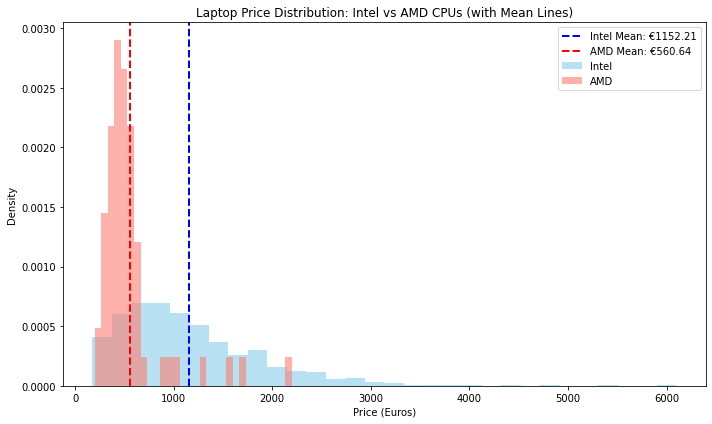

In [11]:
import matplotlib.pyplot as plt

# Filter for Intel and AMD only, drop rows with missing prices
df_cpu_filtered = df1[df1["Cpu_brand"].isin(["Intel", "AMD"])].dropna(subset=["Price_euros"])

# Split by CPU brand
intel_prices = df_cpu_filtered[df_cpu_filtered["Cpu_brand"] == "Intel"]["Price_euros"]
amd_prices = df_cpu_filtered[df_cpu_filtered["Cpu_brand"] == "AMD"]["Price_euros"]

# Calculate means
intel_mean = intel_prices.mean()
amd_mean = amd_prices.mean()

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(intel_prices, bins=30, alpha=0.6, label="Intel", color="skyblue", density=True)
plt.hist(amd_prices, bins=30, alpha=0.6, label="AMD", color="salmon", density=True)

# Plot mean lines
plt.axvline(intel_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Intel Mean: €{intel_mean:.2f}")
plt.axvline(amd_mean, color='red', linestyle='dashed', linewidth=2, label=f"AMD Mean: €{amd_mean:.2f}")

# Title and labels
plt.title("Laptop Price Distribution: Intel vs AMD CPUs (with Mean Lines)")
plt.xlabel("Price (Euros)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

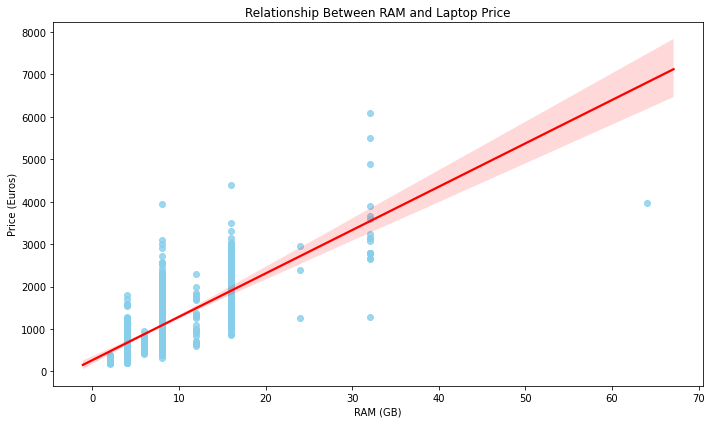

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert RAM from string to integer if it's in 'GB' format
df1["Ram"] = df1["Ram"].str.replace("GB", "").astype(int)

plt.figure(figsize=(10, 6))
sns.regplot(data=df1, x="Ram", y="Price_euros", scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})

plt.title("Relationship Between RAM and Laptop Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.show()

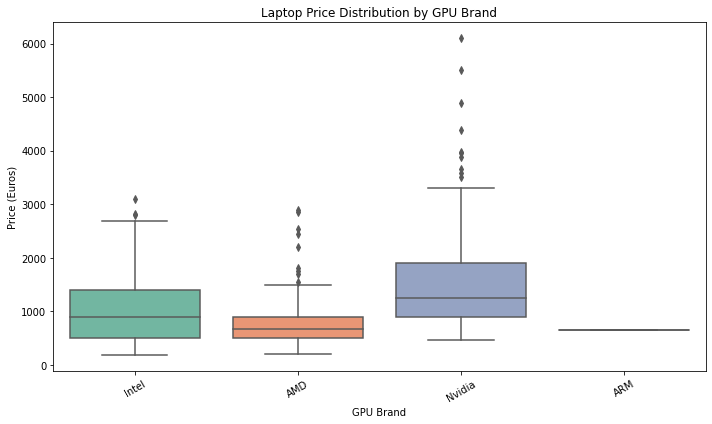

In [13]:
df1['Gpu_brand'] = df1['Gpu'].apply(lambda x: x.split()[0])

# Now plot the boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x="Gpu_brand", y="Price_euros", palette="Set2")

plt.title("Laptop Price Distribution by GPU Brand")
plt.xlabel("GPU Brand")
plt.ylabel("Price (Euros)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [14]:
print(df2.columns)

Index(['index', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')


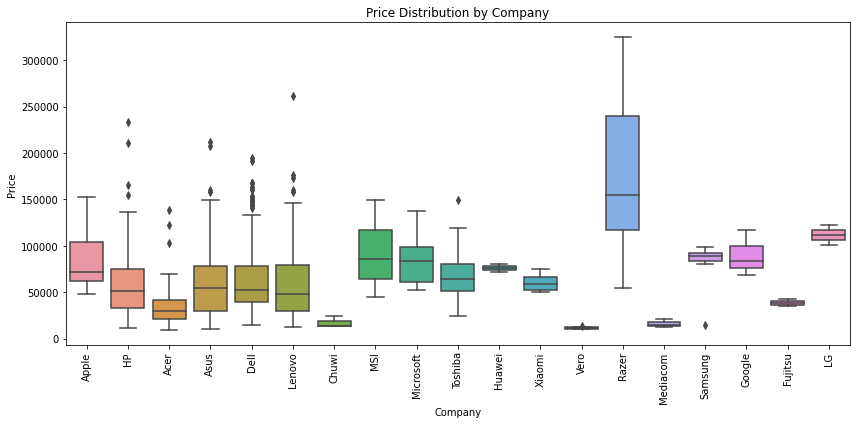

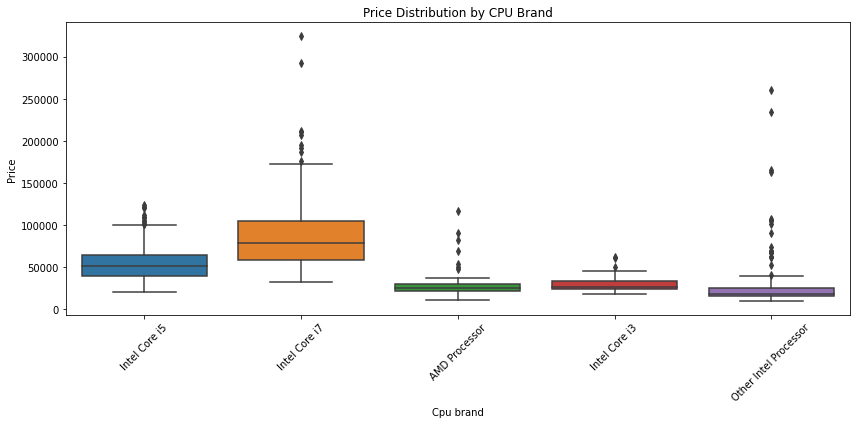

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Company vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price', data=df2)
plt.title('Price Distribution by Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box plot for CPU Brand vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cpu brand', y='Price', data=df2)
plt.title('Price Distribution by CPU Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

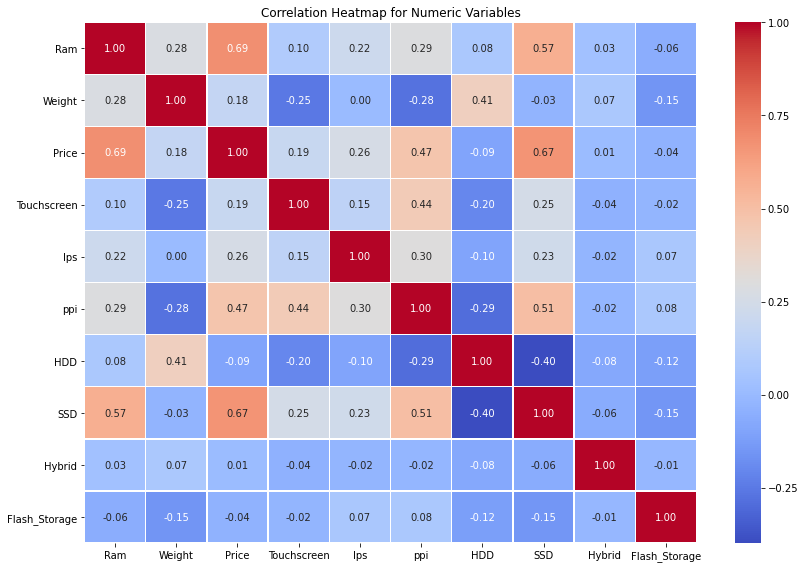

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns from df2
numeric_columns = ['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage']

# Compute the correlation matrix
correlation_matrix = df2[numeric_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Variables')
plt.tight_layout()
plt.show()

In [17]:
print(df3.columns)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Ram',
       'OpSys', 'Cpu Brand', 'Cpu Model', 'Cpu Rate', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'Gpu Brand', 'Gpu Model', 'Unnamed: 16',
       'Price_euros'],
      dtype='object')


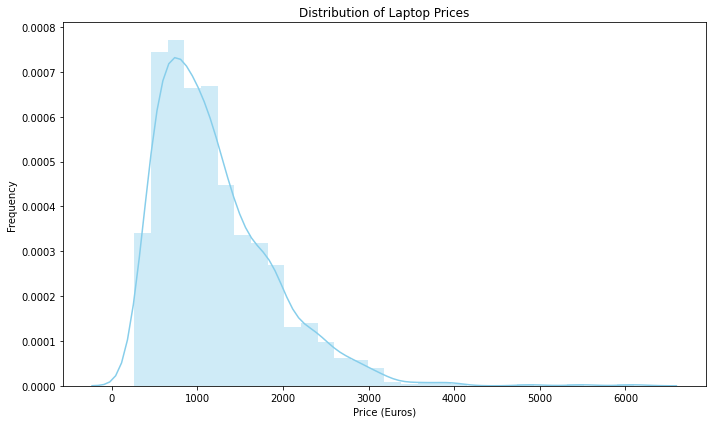

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(df3['Price_euros'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

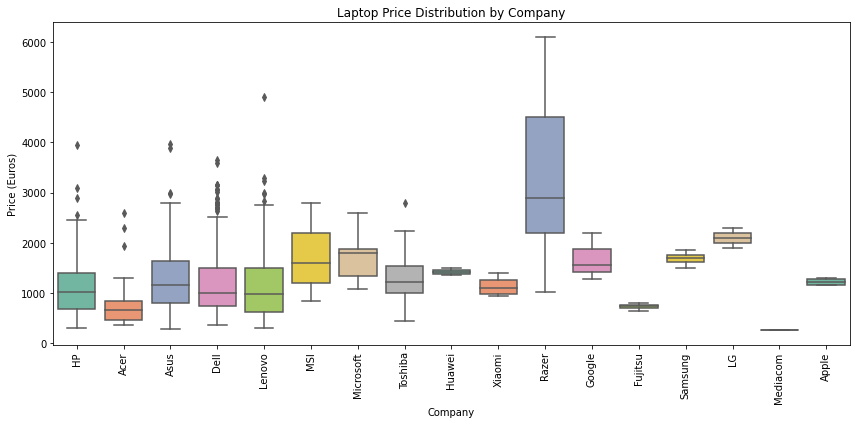

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Company', y='Price_euros', palette="Set2")
plt.title("Laptop Price Distribution by Company")
plt.xlabel("Company")
plt.ylabel("Price (Euros)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

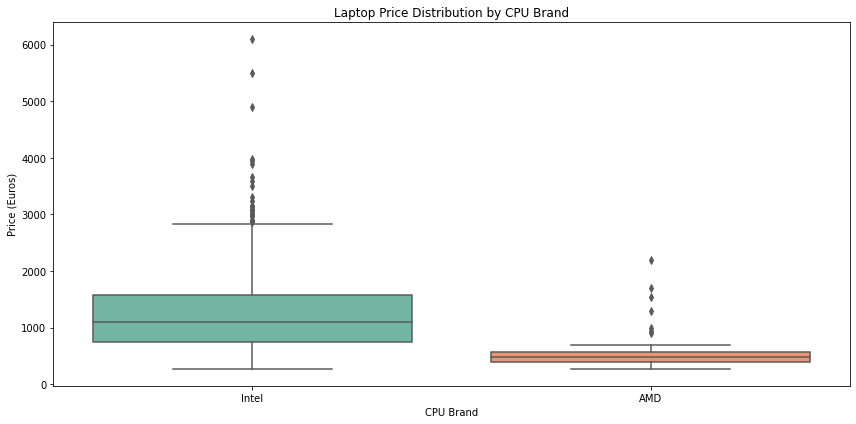

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='Cpu Brand', y='Price_euros', palette="Set2")
plt.title("Laptop Price Distribution by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.show()

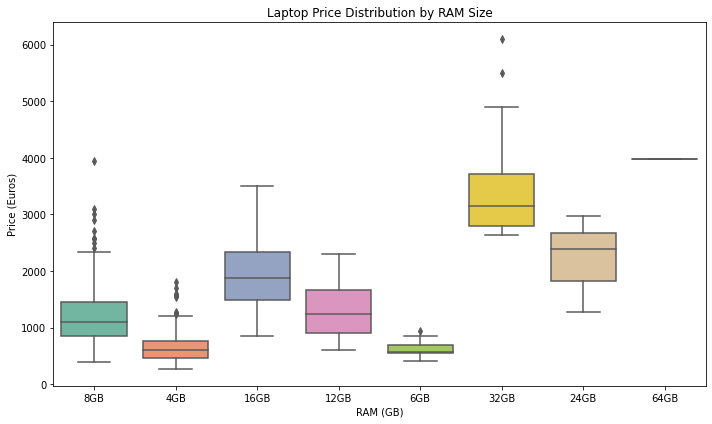

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3, x='Ram', y='Price_euros', palette="Set2")
plt.title("Laptop Price Distribution by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.show()

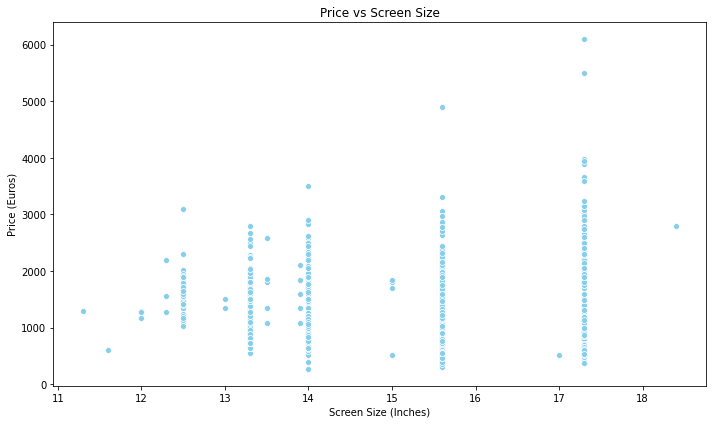

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='Inches', y='Price_euros', color='skyblue')
plt.title("Price vs Screen Size")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.show()

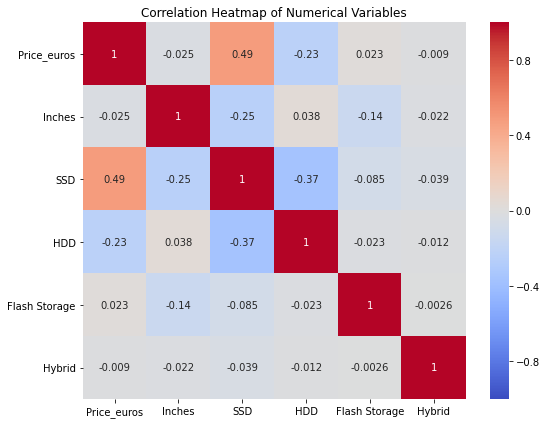

In [24]:
correlation_matrix = df3[['Price_euros', 'Inches', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.show()

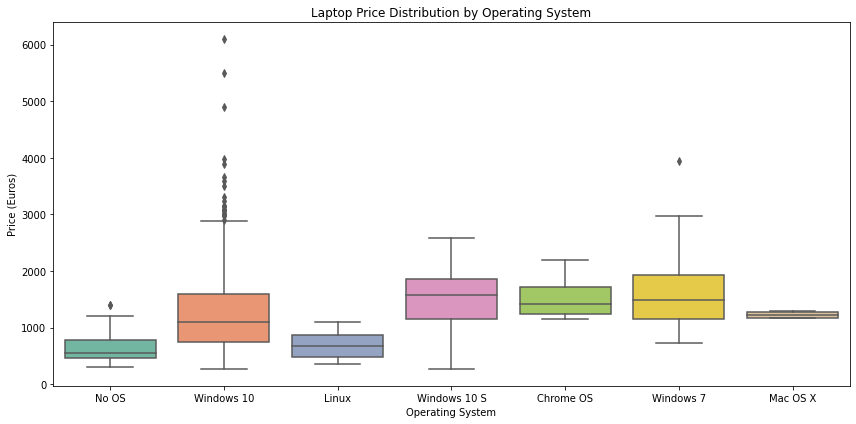

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='OpSys', y='Price_euros', palette="Set2")
plt.title("Laptop Price Distribution by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.show()

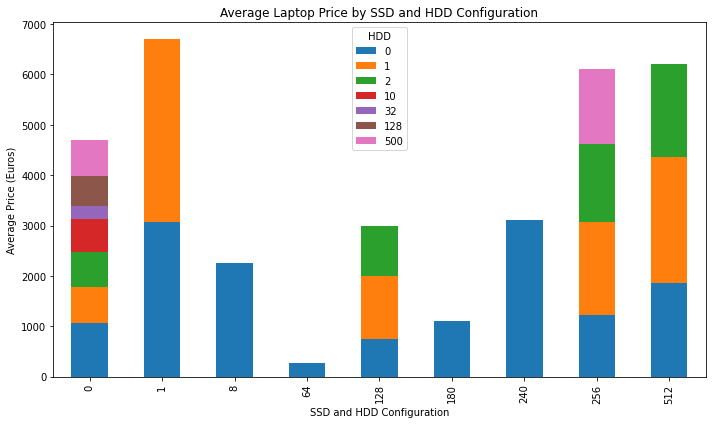

In [26]:
ssd_hdd_price = df3.groupby(['SSD', 'HDD'])['Price_euros'].mean().unstack()
ssd_hdd_price.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Average Laptop Price by SSD and HDD Configuration")
plt.xlabel("SSD and HDD Configuration")
plt.ylabel("Average Price (Euros)")
plt.tight_layout()
plt.show()

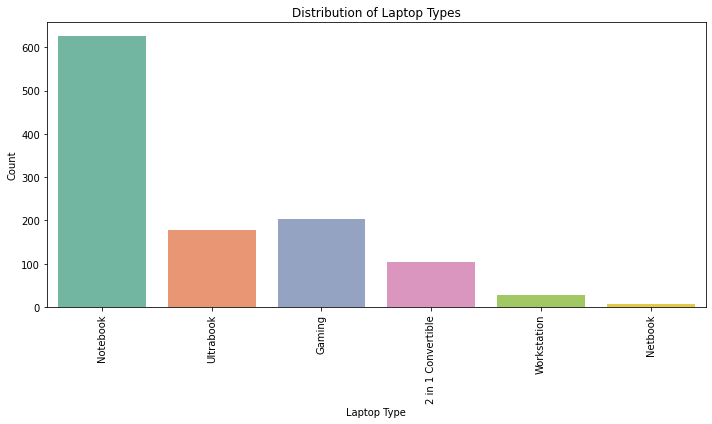

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='TypeName', palette="Set2")
plt.title("Distribution of Laptop Types")
plt.xlabel("Laptop Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

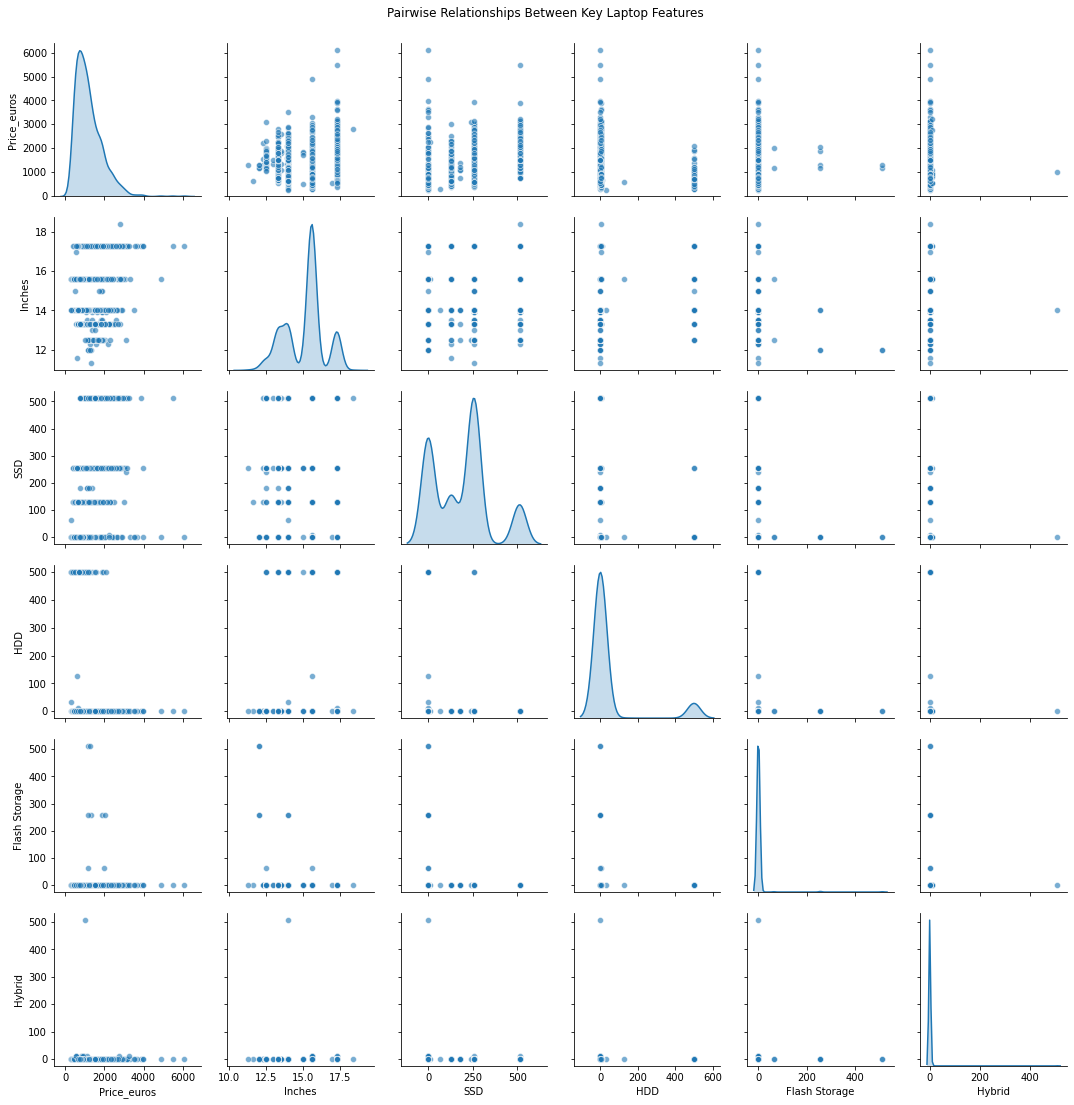

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_cols = ['Price_euros', 'Inches', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']

# Create the pairplot (no 'corner' argument)
sns.pairplot(df3[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships Between Key Laptop Features", y=1.02)
plt.show()

In [29]:
#Conclusion
#The analysis revealed several key insights into how laptop specifications influence pricing.
#Features such as CPU brand, RAM size, SSD capacity, and display characteristics (Touchscreen, IPS, PPI) had significant impact
#on the price of laptops across all models. Among these, the CPU brand stood out consistently as one of the most influential
#factors, particularly in distinguishing higher-end laptops from budget ones.

#Clustering analysis using KMeans grouped laptops into distinct categories, often aligning with performance tiers or use cases,
#such as gaming, general use, and lightweight portable models. This suggests that machine learning can be useful in product
#recommendation or market segmentation.

#The pairwise plots and heatmaps supported the modeling by visually confirming correlations between variables. Additionally, 
#classification models helped identify features that differentiate higher- and lower-priced laptops, which could be helpful for 
#consumers or retailers.

#To build on this project, future work could include:
#Adding performance benchmarks: Including real-world performance scores (e.g., PassMark, Geekbench) would provide a more nuanced
#view of CPU and GPU impact beyond brand/model name.
#Natural Language Processing (NLP): Analyzing user reviews or product descriptions could help understand how qualitative factors
#(like build quality or brand reputation) affect perceived value.
#Expanding the dataset: Including features like battery life, screen brightness, or build material (plastic vs aluminum) 
#could give a more complete picture of price determinants.

#Time analysis: Adding release dates would allow temporal trend analysis (e.g., price depreciation or inflation over time).
#Web scraping or API integration: Automatically updating the dataset with new models for real-time insights.
#Overall, the combination of statistical models and machine learning methods proved valuable in understanding laptop pricing,
#and the project provides a solid foundation for more complex future analyses.

In [31]:
#References:
#https://www.kaggle.com/datasets/abdocan/laptop-prices
#https://www.kaggle.com/datasets/abdelrahmanemad594/laptop-prices
#https://www.kaggle.com/datasets/muhammetvarl/laptop-price